# Data Analyst Job Market Analysis

This analysis aims to explore the current job market for Data Analyst roles by examining job listings from LinkedIn.

## Questions answred with the help of analysis


### Skills Analysis

1. **Skill's Frequency**
    - What are the most frequently mentioned skills in Data Analyst job listings?
    - How do the skills appear visually in a word cloud?

2. **Skill Clustering**
    - How are related skills grouped together using TF-IDF vectorization and K-means clustering?
    - What do the clusters of related skills look like when visualized using PCA?

3. **Skills by Experience Level**
    - What are the top 5 skills required for different experience levels (Entry, Mid, Senior) in Data Analyst roles?


### Educational Requirements

4. **Degree Distribution**
    - What is the distribution of educational qualifications (Bachelor's, Master's, PhD) required for Data Analyst job openings?

5. **Top Skills by Degree**
    - What are the top 10 skills required for jobs that specify different educational qualifications (Bachelor's, Master's, PhD)?


### Work Mode Analysis

6. **Work Mode Distribution**
    - What is the distribution of Data Analyst jobs by work mode (On-site, Remote, Hybrid)?

7. **Top Skills by Work Mode**
    - What are the top skills associated with different work modes (On-site, Remote, Hybrid)?


### Job Location Analysis

8. **Job Locations**
    - How are Data Analyst job openings geographically distributed across different cities?
    - What do the top 5 cities with the most job openings look like?

9. **Actively Recruiting Locations**
    - Which locations have the most actively recruiting companies for Data Analyst positions?


### Company Analysis

10. **Companies with Most Job Openings**
    - Which companies have the most job openings for Data Analysts?

11. **Actively Recruiting Companies**
    - Which companies are actively recruiting for Data Analyst positions?


### Industry Analysis

12. **Industry Distribution**
    - What is the distribution of Data Analyst job openings across different industries?

13. **Actively Recruiting Industries**
    - Which industries are actively recruiting for Data Analyst positions?

14. **Employee Size Distribution**
    - How is the distribution of Data Analyst job openings based on the employee size of companies?

15. **Work Mode by Employee Size**
    - How do different work modes (On-site, Remote, Hybrid) distribute across various employee sizes?

16. **Top Skills by Industry**
    - What are the top skills required for each industry?

In [282]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
from IPython.display import display
import pandas, os, geopy
from geopy.geocoders import Nominatim
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from process_skill import remove_stopwords, tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [284]:
df = pd.read_csv('modified_data1.csv')

In [286]:
df.head()

Link  \
0  https://www.linkedin.com/jobs/view/3871211589/...   
1  https://www.linkedin.com/jobs/view/3881927769/...   
2  https://www.linkedin.com/jobs/view/3864938745/...   
3  https://www.linkedin.com/jobs/view/3886240396/...   
4  https://www.linkedin.com/jobs/view/3869251340/...   

                          Job Title  \
0                      Data Analyst   
1  Associate Analyst Data Analytics   
2                      Data Analyst   
3                      Data Analyst   
4                      Data Analyst   

                                     Required Skills  \
0            Data Governance , Business Tax Planning   
1  JavaScript , Object-Oriented Programming ( OOP...   
2  Python ( Programming Language ) SQL , Groovy ,...   
3                                                NaN   
4                                                NaN   

                                     Job Description Required Experience  \
0                                                NaN           Associate   
1                                                NaN           Associate   
2                                                NaN           Associate   
3  About the job\nCompany Description\n Bytical i...                 NaN   
4                                                NaN           Associate   

                Company Name                Location Employee Size  \
0                      Hyqoo                     NaN       51-200    
1          Tyson Foods India  Bengaluru, Karnataka,       10,001+    
2  TELUS International India                     NaN      10,001+    
3                    Bytical                     NaN        Nov-50   
4                      Turno  Bengaluru, Karnataka,        51-200    

                            Industry Work Mode Actively recruiting       City  \
0      IT Services and IT Consulting    Remote                 Yes        NaN   
1                    Food Production    Hybrid                 Yes  Bengaluru   
2  Information Technology & Services    Remote                 Yes        NaN   
3                                NaN    Remote                 Yes        NaN   
4                 Financial Services   On-site                 Yes  Bengaluru   

       State                            Cleaned_Job_Description  bachelor  \
0        NaN                                                NaN         0   
1  Karnataka                                                NaN         0   
2        NaN                                                NaN         0   
3        NaN  job company description bytical dedicated help...         1   
4  Karnataka                                                NaN         0   

   master  phd  
0       0    0  
1       0    0  
2       0    0  
3       0    0  
4       0    0

In [288]:
df.dropna(subset=['Required Skills'], inplace=True)
df['Required Skills'] = df['Required Skills'].astype(str)
df['Required Skills'] = df['Required Skills'].str.lower()

In [290]:
def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    tokenizer = nltk.tokenize.ToktokTokenizer()
    string = tokenizer.tokenize(string, return_str=True)
    return string

def remove_stopwords(string, extra_words=[], exclude_words=[]):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    stopword_list = stopwords.words('english')
    stopword_list = set(stopword_list) - set(exclude_words)
    stopword_list = stopword_list.union(set(extra_words))

    words = string.split()
    filtered_words = [word for word in words if word not in stopword_list]
    string_without_stopwords = ' '.join(filtered_words)

    return string_without_stopwords

In [292]:
df['Required Skills'] = df['Required Skills'].apply(tokenize)
df['Required Skills'] = df['Required Skills'].apply(remove_stopwords)

In [294]:
all_tokens = [token.strip() for tokens_list in df['Required Skills'] for token in tokens_list.split(',')]

token_frequency = pd.Series(all_tokens).value_counts()

# extract tokens with frequency greater than or equal to a threshold (e.g., 5)
threshold = 5
selected_tokens = token_frequency[token_frequency >= threshold].index.tolist()


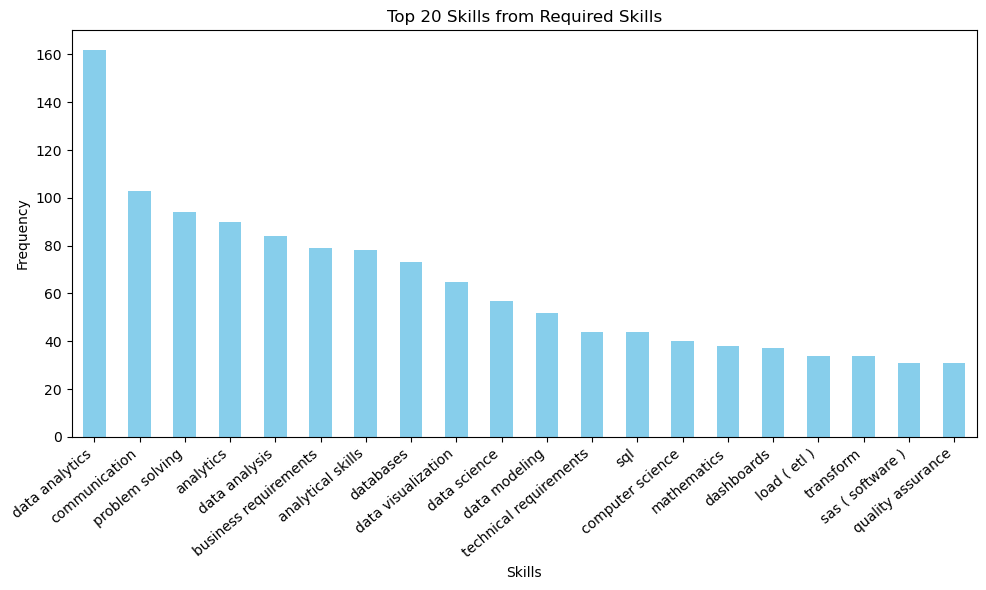

In [324]:

selected_tokens_sorted = token_frequency[selected_tokens].sort_values(ascending=False)

top_N = 20 # Plot the top N tokens 
top_tokens = selected_tokens_sorted.head(top_N)
top_tokens.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top {} Skills from Required Skills'.format(top_N))
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()



### The most frequently mentioned skills in job listings were identified and visualized. The top 20 skills are shown above:

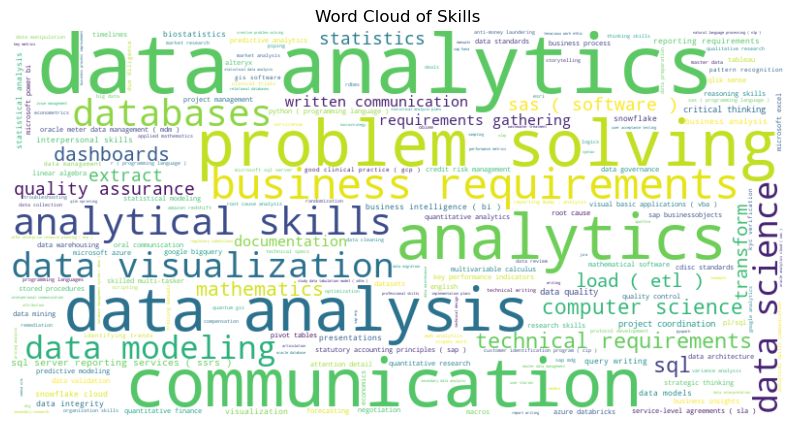

In [161]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_frequency)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Skills')
plt.show()


### A word cloud was generated to provide a visual representation of the skills

In [103]:

# Vectorize tokens using TF-IDF representation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(selected_tokens)  # Pass the list of token strings directly

# Perform K-means clustering
k = 5  # Number of clusters, adjust as needed
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


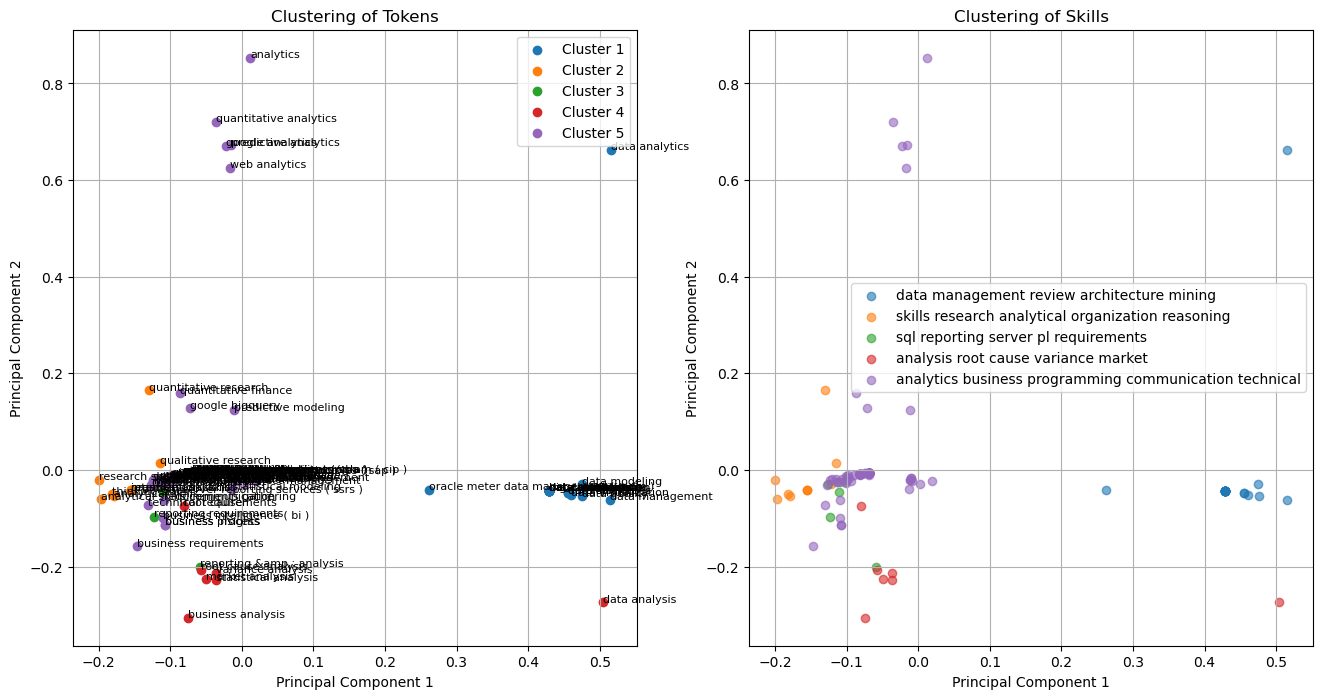

In [105]:

# Plot clusters with labeled tokens
plt.figure(figsize=(16, 8))

# Subplot 1: Token Clustering
plt.subplot(1, 2, 1)
for i in range(k):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i+1}')
    for j, txt in enumerate(selected_tokens):
        if kmeans.labels_[j] == i:
            plt.annotate(txt, (X_pca[j, 0], X_pca[j, 1]), fontsize=8)
plt.title('Clustering of Tokens')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Subplot 2: Skill Clustering
plt.subplot(1, 2, 2)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names_out()

cluster_names = []
for i in range(k):
    top_words = [feature_names[ind] for ind in order_centroids[i, :5]]  # Extract top 5 words from each cluster
    cluster_names.append(' '.join(top_words))

for i in range(k):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=cluster_names[i], alpha=0.6)
plt.title('Clustering of Skills')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Skills were clustered using TF-IDF vectorization and K-means clustering. This helped in identifying groups of related skills. The clusters were visualized using PCA for dimensionality reduction:

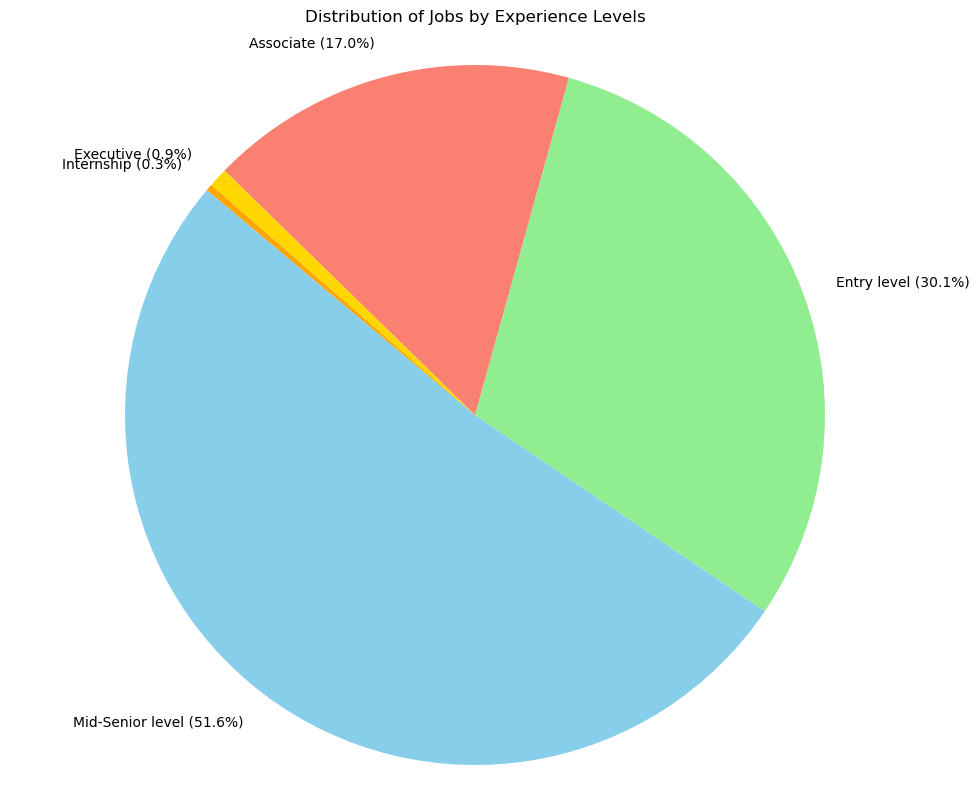

In [108]:
experience_counts = df['Required Experience'].value_counts()

colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orange', 'red']

plt.figure(figsize=(12, 10))
plt.pie(experience_counts, colors=colors, labels=['{} ({:.1f}%)'.format(level, count/sum(experience_counts)*100) for level, count in zip(experience_counts.index, experience_counts)], autopct='', startangle=140)
plt.title('Distribution of Jobs by Experience Levels')
plt.axis('equal')  
plt.show()

### The distribution of Data Analyst job openings based on required experience levels

In [110]:

# Combine tokens into a single list
all_tokens = [token.strip() for skills_list in df['Required Skills'] for token in skills_list]

# Get distinct skills for each experience level
skills_by_experience = df.explode('Required Skills').groupby('Required Experience')['Required Skills'].apply(lambda x: set(x)).reset_index()

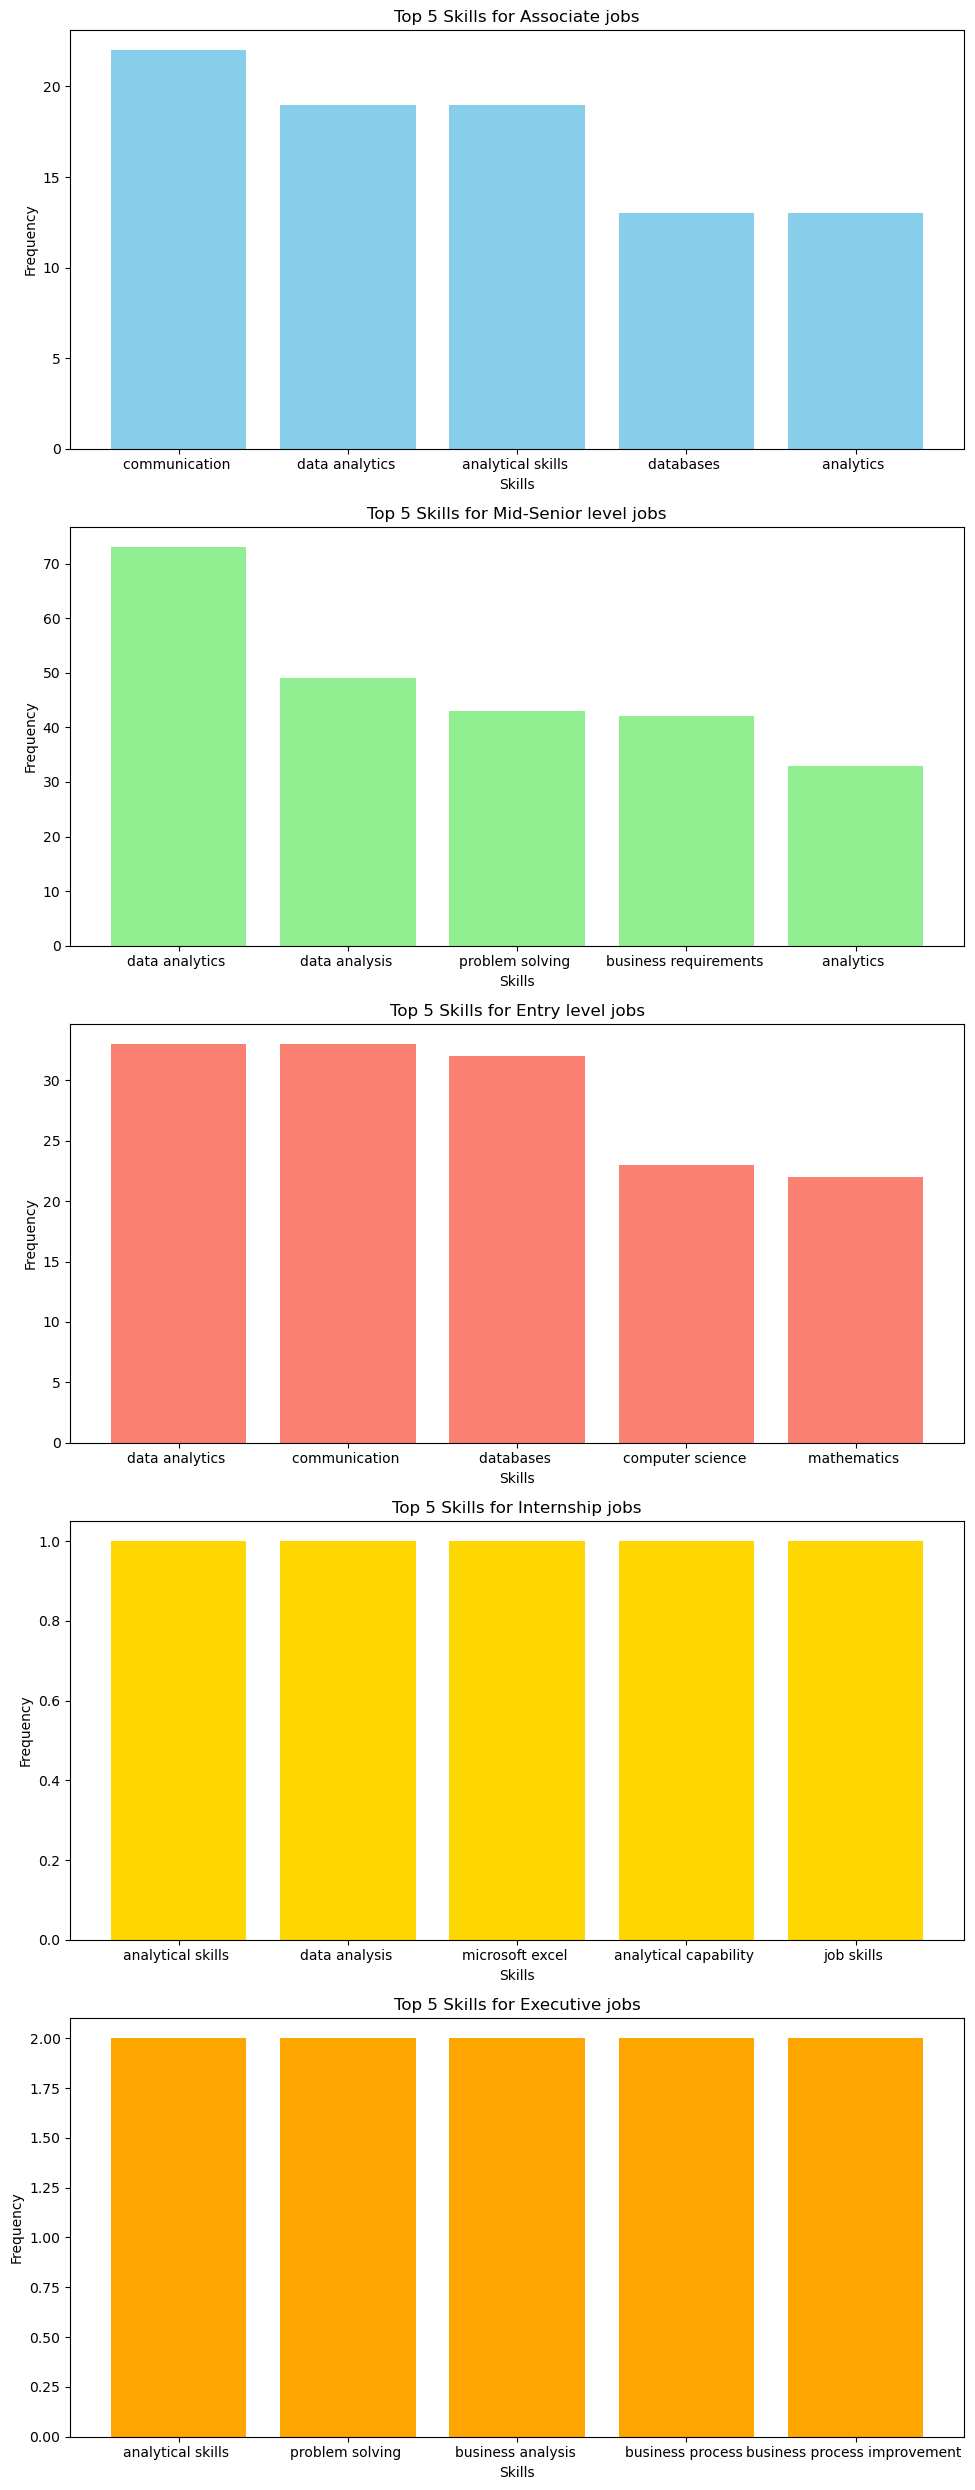

In [313]:
data = df.dropna(subset=['Required Experience']) 

# Create a dictionary to store skills for each experience level
skills_by_experience = {}

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    experience_level = row['Required Experience']
    required_skills = row['Required Skills'].split(', ')
    
    # Check if experience level is already in the dictionary
    if experience_level in skills_by_experience:
        # Extend the existing list of skills
        skills_by_experience[experience_level].extend(required_skills)
    else:
        # Create a new list of skills
        skills_by_experience[experience_level] = required_skills

# Count the occurrences of each skill for each experience level
skill_counts_by_experience = {}
for experience_level, skills in skills_by_experience.items():
    skill_counts_by_experience[experience_level] = pd.Series(skills).value_counts().head(5)

# Plotting
fig, axes = plt.subplots(nrows=len(skill_counts_by_experience), figsize=(10, 5  * len(skill_counts_by_experience)))
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orange']

for i, (experience_level, skill_counts) in enumerate(skill_counts_by_experience.items()):
    ax = axes[i]
    ax.bar(skill_counts.index, skill_counts.values, color=colors[i % len(colors)])
    ax.set_title(f"Top 5 Skills for {experience_level} jobs")
    ax.set_xlabel("Skills")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### The top 5 skills required for different experience levels were identified and visualized:

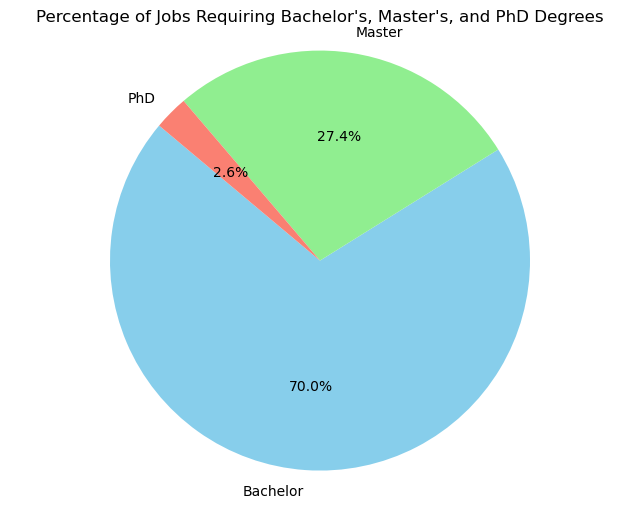

In [114]:
bachelor_count = df['bachelor'].sum()
master_count = df['master'].sum()
phd_count = df['phd'].sum()

# Data for the pie chart
counts = [bachelor_count, master_count, phd_count]
labels = ['Bachelor', 'Master', 'PhD']

# Colors for the pie chart
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Jobs Requiring Bachelor\'s, Master\'s, and PhD Degrees')

# Display percentage along with text
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### The distribution of job openings based on required educational qualifications was analyzed. The percentages of jobs requiring Bachelor's, Master's, and PhD degrees are shown in the pie chart

In [115]:
# Assuming your DataFrame is named df

# Filter DataFrame for each degree level
bachelor_jobs = df[df['bachelor'] == 1]
master_jobs = df[df['master'] == 1]
phd_jobs = df[df['phd'] == 1]


# Function to extract and compile required skills
def extract_skills(data):
    skills = []
    for row in data['Required Skills']:
        if isinstance(row, str):  # Check if it's a non-null string
            skills.extend(row.split(', '))
    return skills

# Extract required skills for each degree level
bachelor_skills = extract_skills(bachelor_jobs)
master_skills = extract_skills(master_jobs)
phd_skills = extract_skills(phd_jobs)

# Count the occurrence of each skill for each degree level
bachelor_skill_counts = pd.Series(bachelor_skills).value_counts()
master_skill_counts = pd.Series(master_skills).value_counts()
phd_skill_counts = pd.Series(phd_skills).value_counts()

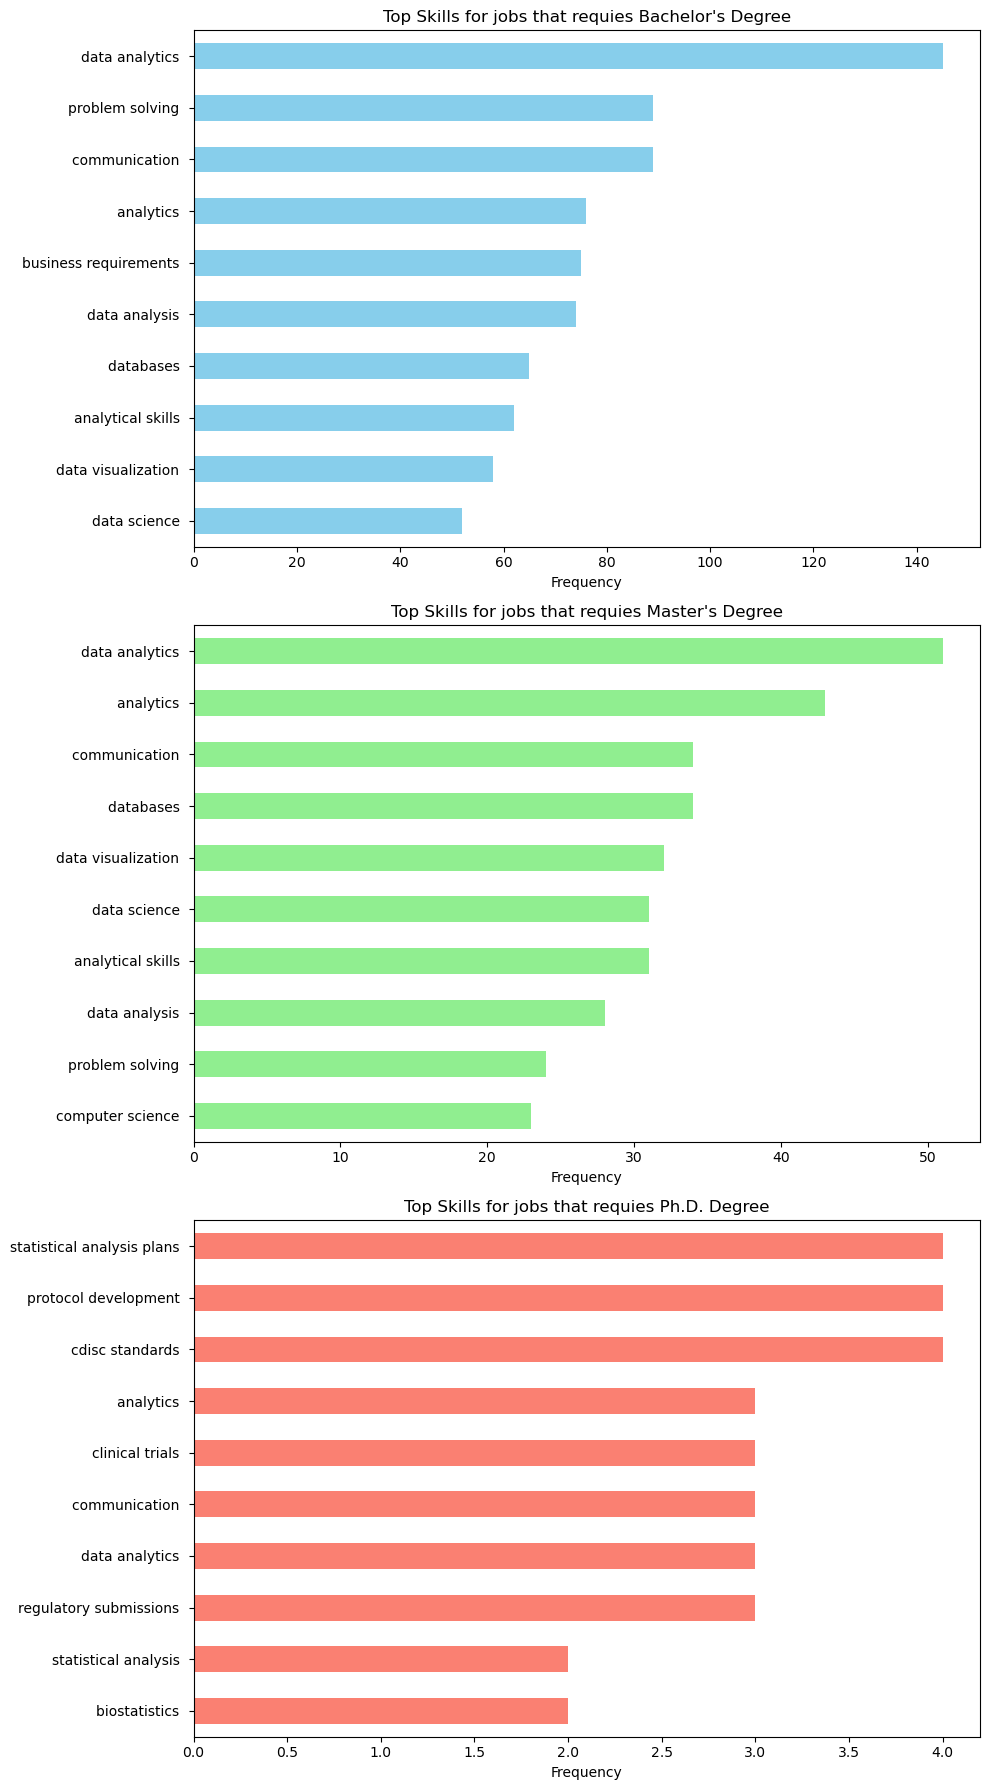

In [117]:
top_n = 10

# Top skills for each degree level
bachelor_top_skills = bachelor_skill_counts.head(top_n).sort_values()
master_top_skills = master_skill_counts.head(top_n).sort_values()
phd_top_skills = phd_skill_counts.head(top_n).sort_values()

# Plotting
plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
bachelor_top_skills.plot(kind='barh', color='skyblue')
plt.title("Top Skills for jobs that requies Bachelor's Degree")
plt.xlabel('Frequency')

plt.subplot(3, 1, 2)
master_top_skills.plot(kind='barh', color='lightgreen')
plt.title("Top Skills for jobs that requies Master's Degree")
plt.xlabel('Frequency')

plt.subplot(3, 1, 3)
phd_top_skills.plot(kind='barh', color='salmon')
plt.title("Top Skills for jobs that requies Ph.D. Degree")
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()


### The top 10 skills required for jobs requiring different educational qualifications were identified:

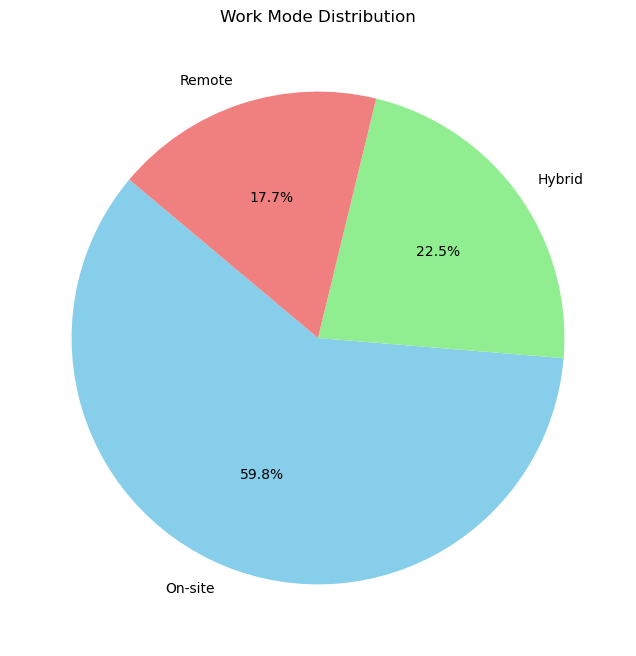

In [121]:

# Count the frequency of each work mode
work_mode_counts = df['Work Mode'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
work_mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Work Mode Distribution')
plt.ylabel('')  # Remove the ylabel
plt.show()

### The distribution of jobs by work mode (On-site, Remote, Hybrid) was analyzed and visualized:

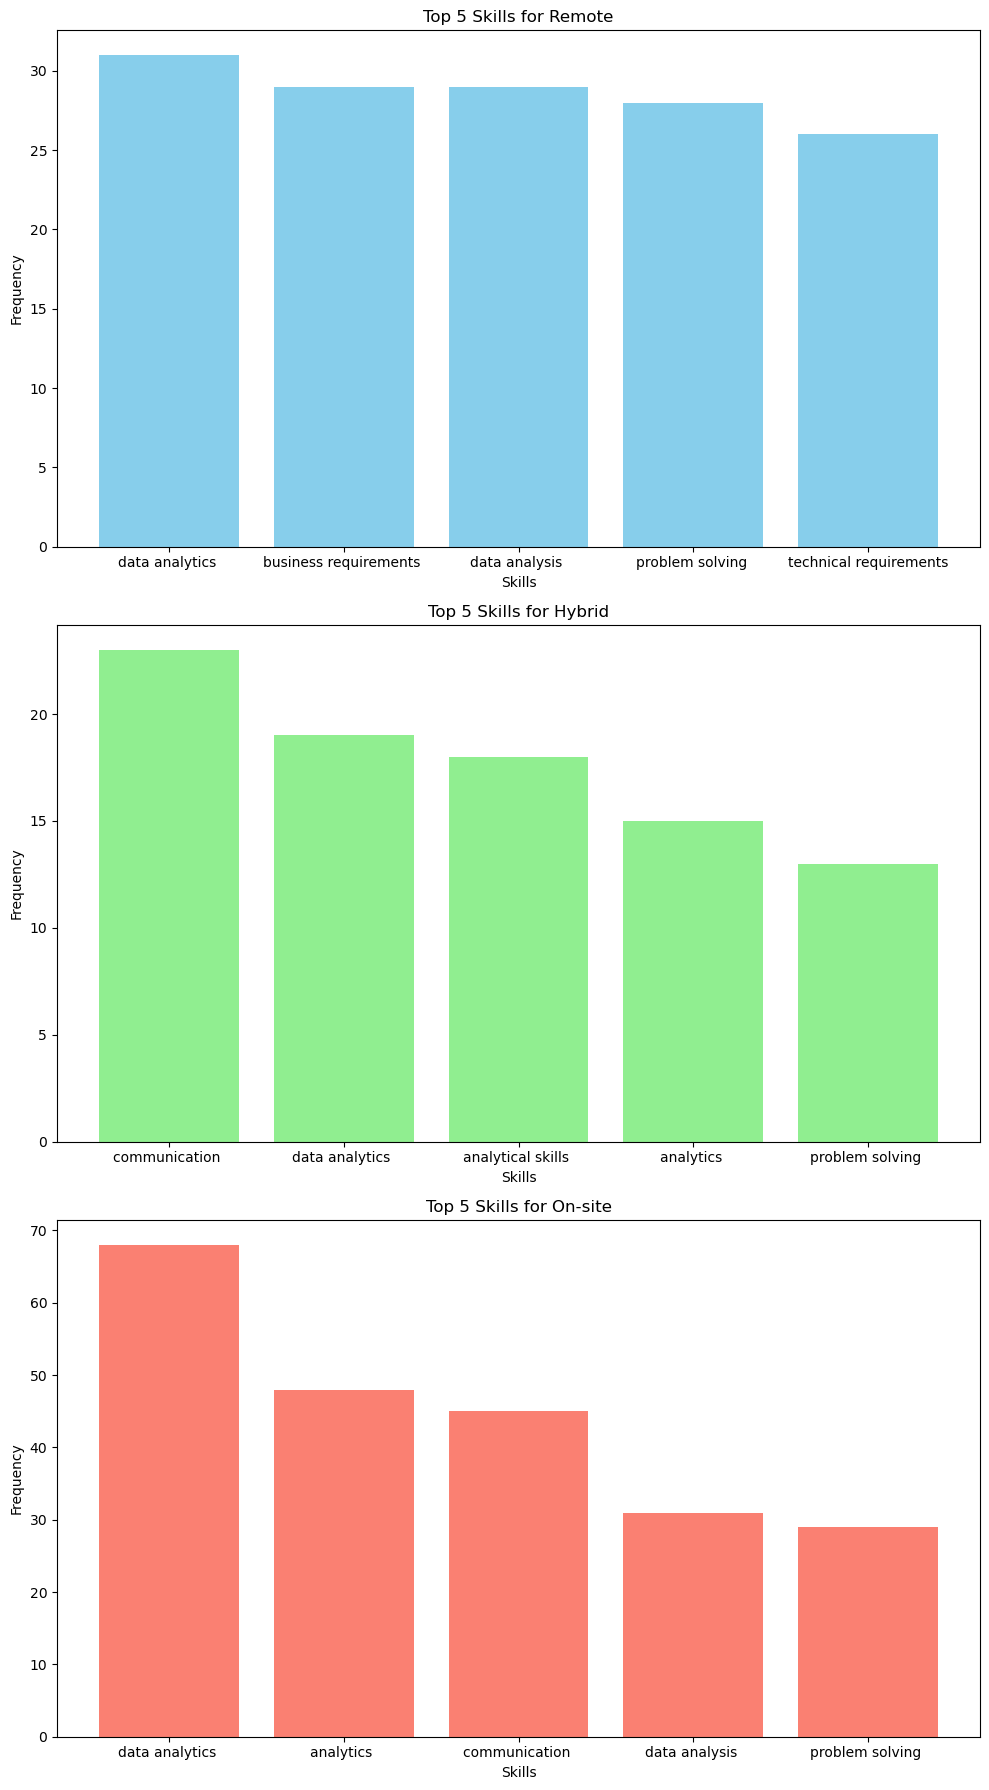

In [123]:

# Assuming df is your DataFrame containing the "Work Mode" and "Required Skills" columns
data = df.dropna(subset=['Work Mode', 'Required Skills'])  # Remove rows where Work Mode or Required Skills are NaN

# Create a dictionary to store skills for each work mode
skills_by_work_mode = {}

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    work_mode = row['Work Mode']
    required_skills = row['Required Skills'].split(', ')
    
    # Check if work mode is already in the dictionary
    if work_mode in skills_by_work_mode:
        # Extend the existing list of skills
        skills_by_work_mode[work_mode].extend(required_skills)
    else:
        # Create a new list of skills
        skills_by_work_mode[work_mode] = required_skills

# Count the occurrences of each skill for each work mode
skill_counts_by_work_mode = {}
for work_mode, skills in skills_by_work_mode.items():
    skill_counts_by_work_mode[work_mode] = pd.Series(skills).value_counts().head(5)

# Plotting
fig, axes = plt.subplots(nrows=len(skill_counts_by_work_mode), figsize=(10, 6 * len(skill_counts_by_work_mode)))
colors = ['skyblue', 'lightgreen', 'salmon']

for i, (work_mode, skill_counts) in enumerate(skill_counts_by_work_mode.items()):
    ax = axes[i]
    ax.bar(skill_counts.index, skill_counts.values, color=colors[i % len(colors)])
    ax.set_title(f"Top 5 Skills for {work_mode}")
    ax.set_xlabel("Skills")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### The top 5 skills required for different work modes were identified:

In [ ]:

data = df

# Extract city names from the 'City' column
cities = data['City'].dropna()

# Initialize geocoder
geolocator = Nominatim(user_agent="city_explorer")

# Initialize an empty list to store city coordinates
city_coordinates = []

# Iterate over each city and obtain its coordinates
for city in cities:
    location = geolocator.geocode(city)
    if location:
        city_coordinates.append({'City': city, 'Latitude': location.latitude, 'Longitude': location.longitude})
    else:
        city_coordinates.append({'City': city, 'Latitude': None, 'Longitude': None})

city_coordinates_df = pd.DataFrame(city_coordinates)

In [ ]:
print(city_coordinates_df)

In [ ]:
# Changed the Latitude & Longitude, because it was comming something else from above script, so we did it manually

surat_index = city_coordinates_df[city_coordinates_df['City'] == 'Surat'].index

city_coordinates_df.loc[surat_index, 'Latitude'] = 21.1702
city_coordinates_df.loc[surat_index, 'Longitude'] = 72.8311

In [132]:
 city_coordinates_df = pd.read_csv('city_coordinates.csv')

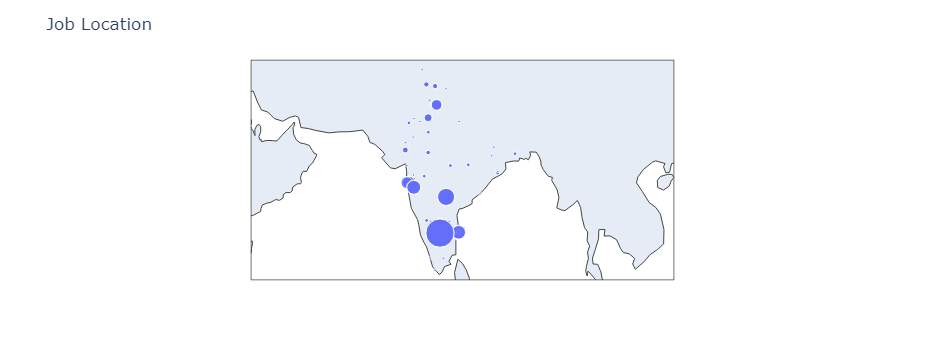

In [134]:
# Create a frequency column in city_coordinates_df
city_coordinates_df['job_count'] = city_coordinates_df.groupby('City')['City'].transform('count')

# Create a scatter plot with bubble size adjusted based on frequency
fig = px.scatter_geo(city_coordinates_df, lat='Latitude', lon='Longitude', hover_name='City', 
                     size='job_count', projection="natural earth", color_continuous_scale='dark', opacity=0.8)

# Update layout
fig.update_layout(title='Job Location')

# Show the plot
fig.show()


### The geographic distribution of job openings was analyzed using city coordinates. A scatter plot with bubble sizes adjusted based on the number of job openings in each city was created:

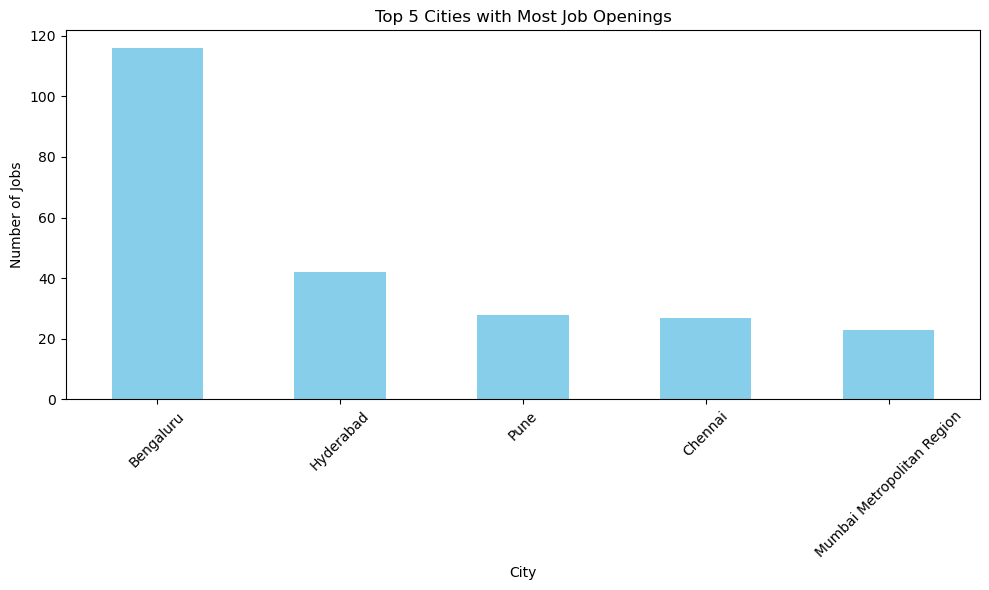

In [136]:

# Count the occurrences of each city in the "City" column
city_counts = df['City'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities with Most Job Openings')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


### The top 5 cities with the most job openings were identified and visualized:

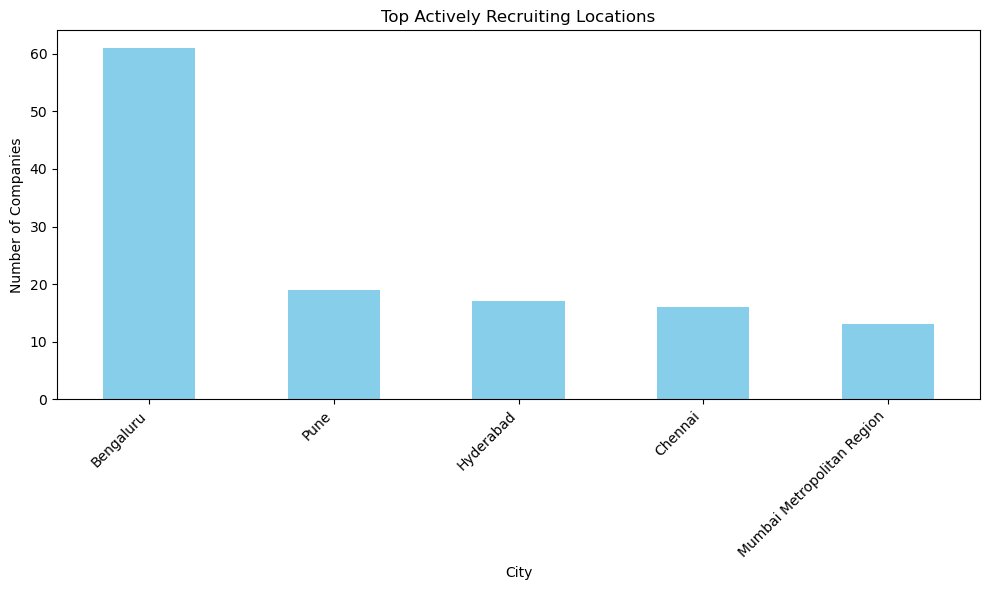

In [138]:
actively_recruiting = df[df['Actively recruiting'] == 'Yes']

# Group by location and count the number of actively recruiting companies
location_counts = actively_recruiting['City'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 6))
location_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Actively Recruiting Locations')
plt.xlabel('City')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###  Locations with the most actively recruiting companies were identified and visualized:




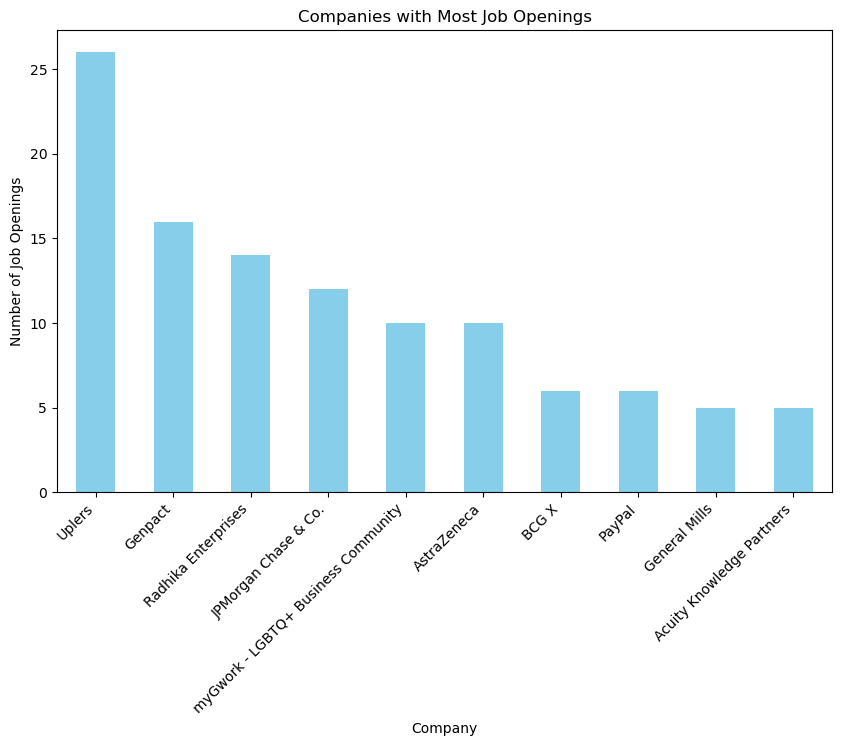

In [140]:


# Count the number of job openings for each company
company_counts = df['Company Name'].value_counts()

top_10_companies = company_counts.head(10)

# Plot visualization
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Job Openings')
plt.title('Companies with Most Job Openings')
plt.xticks(rotation=45, ha='right')
plt.show()


### The top 10 companies with the most job openings were identified:




In [ ]:
# actively_recruiting_companies = df[df['Actively recruiting'] == 'Yes']['Company Name'].unique()

# print("Companies actively recruiting:")
# print(actively_recruiting_companies)

In [196]:

# Filter companies actively recruiting
actively_recruiting_companies = df[df['Actively recruiting'] == 'Yes']

# Count number of job openings for each actively recruiting company
job_openings_count = actively_recruiting_companies.groupby('Company Name').size()


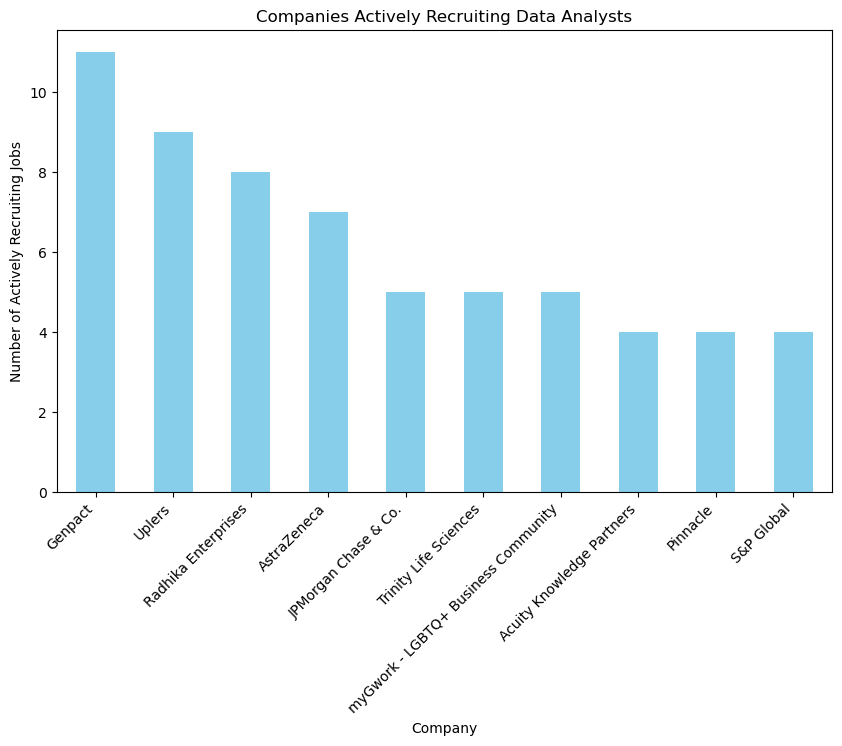

In [198]:
top_5_companies = job_openings_count.nlargest(10)

# Plot visualization
plt.figure(figsize=(10, 6))
top_5_companies.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Actively Recruiting Jobs')
plt.title('Companies Actively Recruiting Data Analysts')
plt.xticks(rotation=45, ha='right')
plt.show()

### Companies actively recruiting were identified and visualized based on the number of job openings:




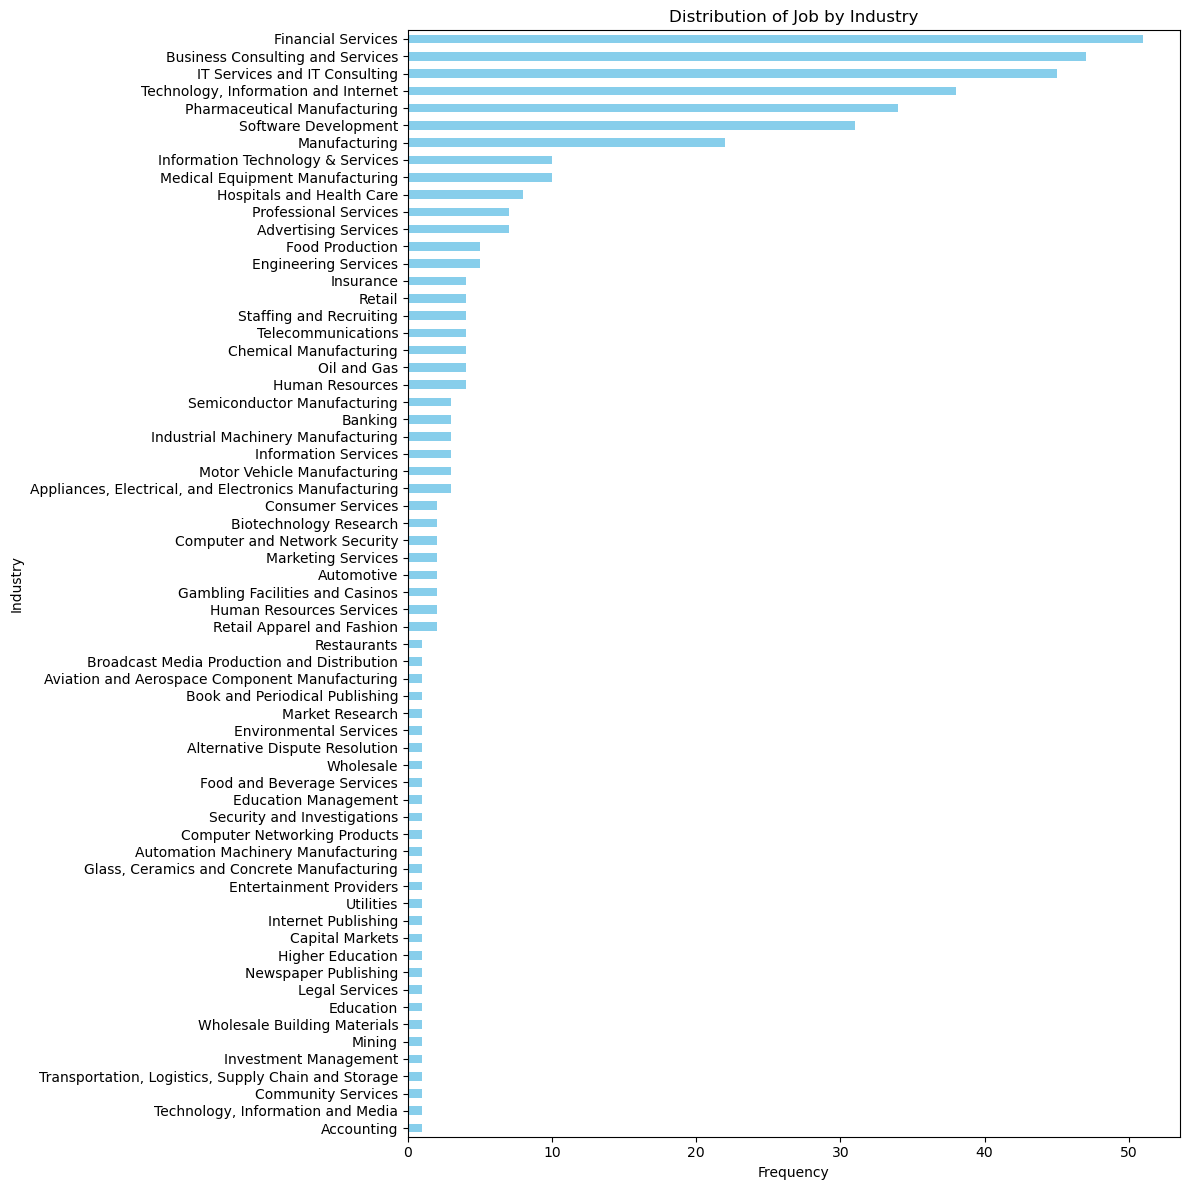

In [200]:

industries = df['Industry']

# Count the occurrences of each industry
industry_counts = industries.value_counts()

# Sort the industries by the number of job openings
industry_counts_sorted = industry_counts.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 12))
industry_counts_sorted.plot(kind='barh', color='skyblue') 
plt.xlabel('Frequency')
plt.ylabel('Industry')
plt.title('Distribution of Job by Industry')
plt.tight_layout()
plt.show()

### The distribution of job openings across different industries was analyzed and visualized:




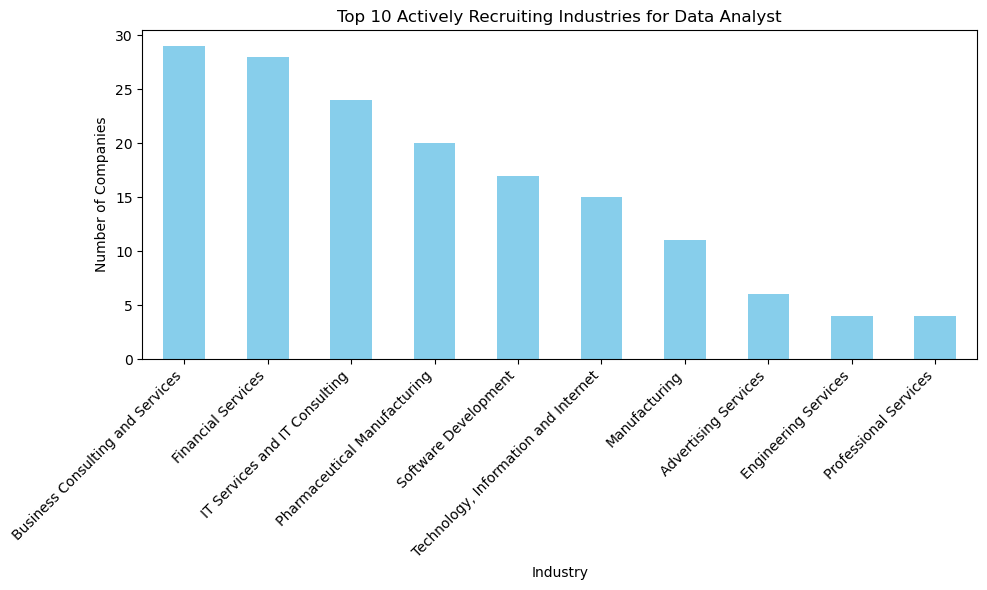

In [202]:
actively_recruiting = df[df['Actively recruiting'] == 'Yes']

# Group by industry and count the number of actively recruiting companies
industry_counts = actively_recruiting['Industry'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
industry_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Actively Recruiting Industries for Data Analyst')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### The top industries actively recruiting for data analyst positions were identified:




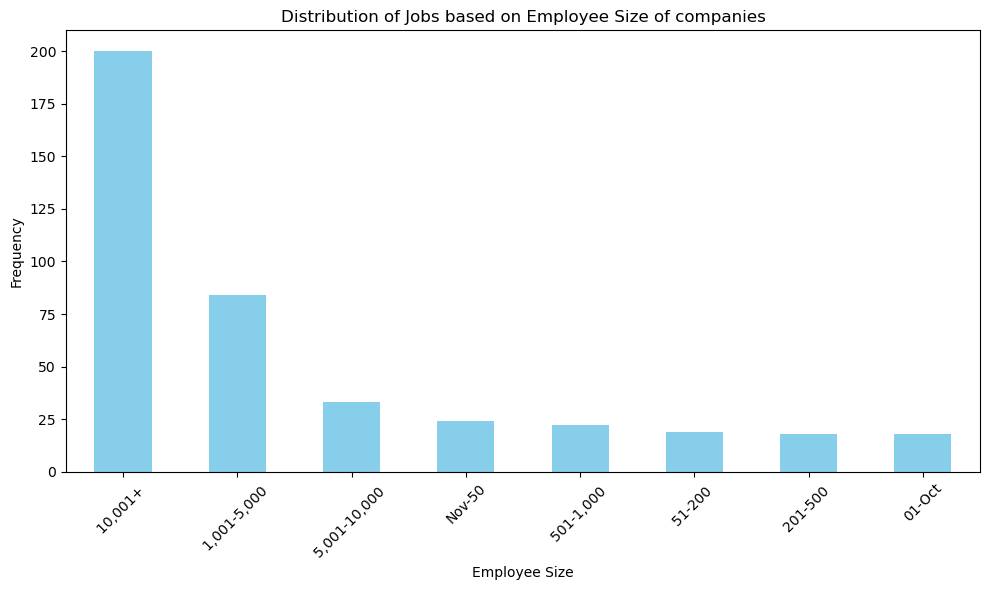

In [204]:
employee_sizes = df['Employee Size']

# Count the occurrences of each employee size
size_counts = employee_sizes.value_counts()

# Plotting
plt.figure(figsize=(10, 6))
size_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Employee Size')
plt.ylabel('Frequency')
plt.title('Distribution of Jobs based on Employee Size of companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The distribution of job openings based on the employee size of companies was analyzed:

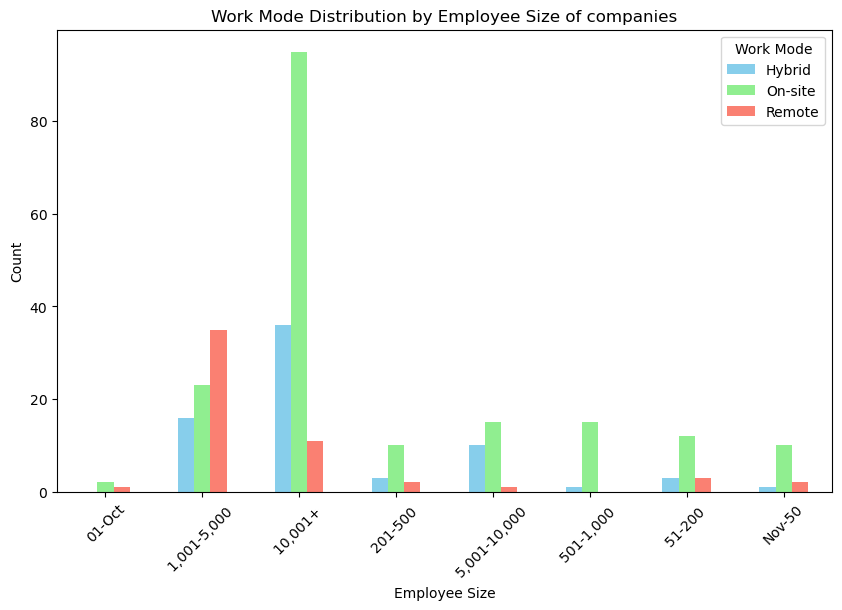

In [205]:
# Count occurrences of each combination of Employee Size and Work Mode
count_df = df.groupby(['Employee Size', 'Work Mode']).size().unstack(fill_value=0)

# Plot
colors = ['skyblue', 'lightgreen', 'salmon']
count_df.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Work Mode Distribution by Employee Size of companies')
plt.xlabel('Employee Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Work Mode')
plt.show()

### The distribution of work modes across different employee sizes was analyzed and visualized:



In [208]:
# df.dropna(subset=['Required Skills'], inplace=True)
# df['Required Skills'] = df['Required Skills'].astype(str)
# df['Required Skills'] = df['Required Skills'].str.lower()


In [ ]:
df['Required Skills'] = df['Required Skills'].str.split(',')

# Create a list of unique skills
all_skills = set(skill.strip() for skills in df['Required Skills'] for skill in skills)

# Create a dictionary to hold skill counts for each industry
industry_skill_counts = {industry: {skill: 0 for skill in all_skills} for industry in df['Industry'].unique()}

# Count occurrences of each skill within each industry
for index, row in df.iterrows():
    industry = row['Industry']
    skills = row['Required Skills']
    for skill in skills:
        industry_skill_counts[industry][skill.strip()] += 1

# Create a DataFrame to hold skill counts for each industry
skill_counts_df = pd.DataFrame(industry_skill_counts).T

# Identify the top skills for each industry
top_skills_per_industry = {}
for industry in skill_counts_df.index:
    top_skills = skill_counts_df.loc[industry].sort_values(ascending=False).head(5)  # Get top 5 skills
    top_skills_per_industry[industry] = top_skills

# Display the top skills for each industry
for industry, skills in top_skills_per_industry.items():
    print(f"Industry: {industry}")
    print(skills)
    print("\n")


In [253]:

# Define a function to update the plot based on the selected industry
def update_plot(industry):
    plt.clf()
    skills = top_skills_per_industry[industry].sort_values()
    plt.barh(skills.index, skills.values, color='skyblue', alpha=0.7)
    plt.title(f"Skills Required by {industry}")
    plt.xlabel('Skill Frequency')
    plt.ylabel('Skill')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

interact(update_plot, industry=list(top_skills_per_industry.keys()))

interactive(children=(Dropdown(description='industry', options=('IT Services and IT Consulting', 'Food Product…

<function __main__.update_plot(industry)>

### The top 5 skills required for each industry were identified and visualized. An interactive plot allows for the selection of different industries to view their respective top skills: